# MNIST  Dataset

# Softmax Function

In [3]:
import numpy as np
def softmax(a: list[float])->np.array:
    if not isinstance (a,np.ndarray):
        raise TypeError('It is not ndarray')
    return np.exp(a)/np.sum(np.exp(a))

In [4]:
print(softmax(np.array([1,2,3,4])))


[0.0320586  0.08714432 0.23688282 0.64391426]


In [5]:
a= np.array([1,2,3,4])
print(softmax(a))

[0.0320586  0.08714432 0.23688282 0.64391426]


In [6]:
a= np.array([20,50,45])
print(softmax(a))

[9.29499379e-14 9.93307149e-01 6.69285092e-03]


In [7]:
def stable_softmax(a: np.ndarray) -> np.ndarray :
    if not isinstance (a, np.ndarray):
        raise TypeError('This is not a Ndarray')
    else:
        return np.exp(a-max(a))/np.sum(np.exp(a-max(a)))

In [8]:
a= np.array([2500,2400,2600])
print(stable_softmax(a))

[3.72007598e-44 1.38389653e-87 1.00000000e+00]


In [9]:
a= np.array([2501,2502,2504])
print(stable_softmax(a))

[0.04201007 0.1141952  0.84379473]


In [10]:
import urllib.request
import gzip
import numpy as np
import pandas as pd
import pickle

In [17]:
url_base='http://jrkwon.com/data/ece5831/mnist/'

In [13]:
key_file = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images':  't10k-images-idx3-ubyte.gz',
    'test_labels':  't10k-labels-idx1-ubyte.gz'
}

In [14]:
pwd

'c:\\Users\\manoj\\OneDrive\\Desktop\\Pattern_Recognition_and_NN\\ece5831-2024-assignments\\05'

In [15]:
image_size = 28*28
dataset_dir = 'dataset'
dataset_pkl = 'mnist.pkl'

In [18]:
file_name=key_file['train_images']
file_path=url_base+ file_name

In [19]:
opener= urllib.request.build_opener()
opener.addheaders = [('Accept','')]
urllib.request.install_opener(opener)
urllib.request.urlretrieve(file_path,dataset_dir +'/' +file_name )

('dataset/train-images-idx3-ubyte.gz',
 <http.client.HTTPMessage at 0x1cdffbf2290>)

In [20]:
import os 
def _download(file_name):
    file_path = dataset_dir + '/' + file_name

    if (os.path.exists(file_path)):
        print(f'File: {file_name} already exists.')
        return
    
    print(f'Downloading {file_name}...')

    # to resolve 406 Not Acceptable error
    opener = urllib.request.build_opener()
    opener.addheaders = [('Accept', '')]
    urllib.request.install_opener(opener)

    urllib.request.urlretrieve(url_base + file_name, file_path)
    print('Done')

In [21]:
_download(key_file['train_images'])

File: train-images-idx3-ubyte.gz already exists.


In [22]:
def download_all():
    for filename in key_file.values():
        _download(filename)


In [23]:
download_all()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.


In [24]:
def _load_image(file_name):
    with gzip.open(file_name,'rb') as f:
        images = np.frombuffer(f.read(),np.int8, offset=16)
    images = images.reshape(-1,image_size)
    
    return images

In [25]:
images = _load_image(dataset_dir + '/' + key_file['test_images'])

In [26]:
images.shape

(10000, 784)

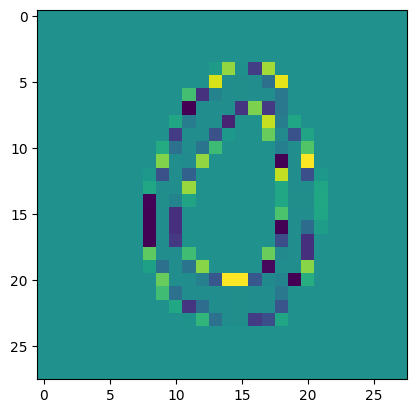

In [27]:
import matplotlib.pyplot as plt
idx=1001
a= images[1001].reshape(28,28)
plt.imshow(a)

In [28]:
def _load_labels(file_name):
    print(file_name)
    with gzip.open(file_name, 'rb') as f:
        labels = np.frombuffer(f.read(),np.int8, offset=8)
    
    return labels

In [29]:
labels= _load_labels(f"{dataset_dir}/{key_file['test_labels']}")

dataset/t10k-labels-idx1-ubyte.gz


In [30]:
labels[idx]
dataset_pkl = 'mnist.pkl'


In [31]:
def _create_dataset():
    dataset = {}
    dataset['train_images']= _load_image(f"{dataset_dir}/{key_file['train_images']}")
    dataset['test_images'] = _load_image(f"{dataset_dir}/{key_file['test_images']}")
    dataset['train_labels'] = _load_labels(f"{dataset_dir}/{key_file['train_labels']}")
    dataset['test_labels'] = _load_labels(f"{dataset_dir}/{key_file['test_labels']}")
    
    with open(f'{dataset_dir}/{dataset_pkl}','wb') as f:
        print('fPickle: {dataset_dir}/{dataset_pkl} is created')
        pickle.dump(dataset, f)
        print('Done')
    return dataset

In [32]:
dataset = _create_dataset()

dataset/train-labels-idx1-ubyte.gz
dataset/t10k-labels-idx1-ubyte.gz
fPickle: {dataset_dir}/{dataset_pkl} is created
Done


In [33]:
import pickle
with open('dataset/mnist.pkl','rb') as file:
    dataset = pickle.load(file)

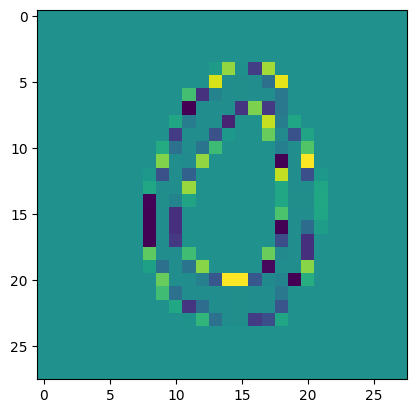

In [34]:
plt.imshow(dataset['test_images'][idx].reshape(28,28))

In [37]:
def _change_one_hot_label(y , num_class):
    t = np.zeros((y.size, num_class))
    for idx, row in enumerate(t):
        row[y[idx]] = 1
    return t

In [38]:
y = np.array([1,0,9,8])
one_hot_y = _change_one_hot_label(y,10)

In [40]:
class MnistData():

    image_dim = (28, 28)
    image_size = image_dim[0]*image_dim[1]
    dataset_dir = 'dataset'
    dataset_pkl = 'mnist.pkl'
    url_base = 'http://jrkwon.com/data/ece5831/mnist/' # 'https://yann.lecun.com/exdb/mnist/'

    key_file = {
        'train_images': 'train-images-idx3-ubyte.gz',
        'train_labels': 'train-labels-idx1-ubyte.gz',
        'test_images':  't10k-images-idx3-ubyte.gz',
        'test_labels':  't10k-labels-idx1-ubyte.gz'
    }

    def __init__(self):
        self.dataset = {}
        self.dataset_pkl_path = f'{self.dataset_dir}/{self.dataset_pkl}'

        # create dataset_dir if the dir doesn't exist
        if os.path.exists(self.dataset_dir) is not True:
            os.mkdir(self.dataset_dir)

        self._init_dataset()


    def _change_one_hot_label(self, y, num_class):
        t = np.zeros((y.size, num_class))
        for idx, row in enumerate(t):
            row[y[idx]] = 1
        
        return t


    def _download(self, file_name):
        file_path = self.dataset_dir + '/' + file_name

        if (os.path.exists(file_path)):
            print(f'File: {file_name} already exists.')
            return
        
        print(f'Downloading {file_name}...')

        # to resolve 406 Not Acceptable error
        opener = urllib.request.build_opener()
        opener.addheaders = [('Accept', '')]
        urllib.request.install_opener(opener)

        urllib.request.urlretrieve(self.url_base + file_name, file_path)
        print('Done')


    def _download_all(self):
        for file_name in self.key_file.values():
            self._download(file_name)

    
    def _load_images(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, self.image_size)

        return images
    

    def _load_labels(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)

        return labels
    

    def _create_dataset(self):
        file_name = f"{self.dataset_dir}/{self.key_file['train_images']}"
        self.dataset['train_images'] = self._load_images(file_name)

        file_name = f"{self.dataset_dir}/{self.key_file['train_labels']}"
        self.dataset['train_labels'] = self._load_labels(file_name)

        file_name = f"{self.dataset_dir}/{self.key_file['test_images']}"
        self.dataset['test_images']  = self._load_images(file_name)

        file_name = f"{self.dataset_dir}/{self.key_file['test_labels']}"
        self.dataset['test_labels']  = self._load_labels(file_name)

        with open(f'{self.dataset_pkl_path}', 'wb') as f:
            print(f'Pickle: {self.dataset_pkl_path} is being created.')
            pickle.dump(self.dataset, f)
            print('Done.') 


    def _init_dataset(self):
        self._download_all()
        if os.path.exists(f'{self.dataset_pkl_path}'):
            with open(f'{self.dataset_pkl_path}', 'rb') as f:
                print(f'Pickle: {self.dataset_pkl_path} already exists.')
                print('Loading...')
                self.dataset = pickle.load(f)
                print('Done.')
        else:
            self._create_dataset()


    def load(self):
        # normalize image datasets
        for key in ('train_images', 'test_images'):
            self.dataset[key] = self.dataset[key].astype(np.float32)
            self.dataset[key] /= 255.0

        # one-hot encoding
        for key in ('train_labels', 'test_labels'):
            self.dataset[key] = self._change_one_hot_label(self.dataset[key], 10)

        return (self.dataset['train_images'], self.dataset['train_labels']), \
                (self.dataset['test_images'], self.dataset['test_labels'])

In [41]:
mnist_data = MnistData()
(_, _), (test_images, test_labels) = mnist_data.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [42]:
mnist_data = MnistData()
(_, _), (test_images, test_labels) = mnist_data.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [43]:
test_images.shape

(10000, 784)

In [44]:
labels = mnist_data.dataset['test_labels']

In [45]:
# Note that the labels are not one-hot-encoded.
labels.shape

(10000, 10)

Label (one-hot): [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Label: 0


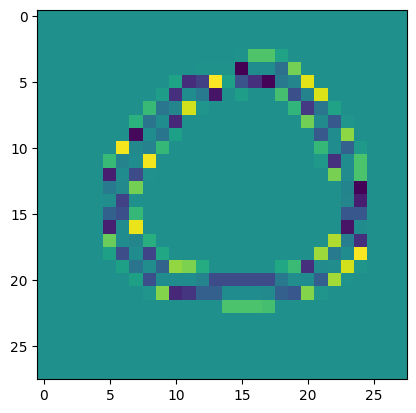

In [47]:
idx = np.random.randint(test_images.shape[0], size=1)
print(f'Label (one-hot): {test_labels[idx]}')
print(f'Label: {np.argmax(test_labels[idx])}')
plt.imshow(test_images[idx].reshape(28,28))